In [1]:
import f3dasm

In [2]:
dimensions= 2
hyperparameters = {}
seed = 42
iterations = 20

In [3]:
design = f3dasm.make_nd_continuous_design(bounds=[-1.,1.], dimensions=dimensions)
# Sampler
lhs_sampler = f3dasm.sampling.LatinHypercubeSampling(doe=design, seed=seed)
data = lhs_sampler.get_samples(numsamples=5)
data.data


input           output
         x0        x1      y
0 -0.850184  0.883229    NaN
1 -0.137593 -0.137602    NaN
2  0.223233 -0.619714    NaN
3 -0.307202  0.546470    NaN
4  0.840446 -0.360537    NaN

In [4]:
data.get_n_best_input_parameters_numpy(1).ravel()


array([-0.85018395,  0.88322903])

In [5]:
sphere = f3dasm.simulation.Sphere(noise=False, dimensionality=dimensions)
leon = f3dasm.simulation.Leon(dimensionality=dimensions)
ackley = f3dasm.simulation.Ackley(dimensionality=dimensions)

langermann = f3dasm.simulation.Levy(dimensionality=dimensions, scale_bounds=[-1.,1.])

# Evaluate the initial samples
data.add_output(output=langermann.eval(data),label="y")
data.data

input                  output
         x0        x1             y
0 -0.850184  0.883229  1.619195e-16
1 -0.137593 -0.137602 -2.184089e-02
2  0.223233 -0.619714  3.037680e-07
3 -0.307202  0.546470 -3.375423e-03
4  0.840446 -0.360537 -2.255268e-06

In [6]:
opt = f3dasm.optimization.SGD(data=data, seed=seed)
opt.iterate(iterations=100, function=langermann)
d = opt.extract_data()
d.data
# opt1 = SGD(data=data)
# opt1.iterate(iterations=i, function=leon)

d.data


input                  output
           x0        x1             y
0   -0.850184  0.883229  1.619195e-16
1   -0.137593 -0.137602 -2.184089e-02
2    0.223233 -0.619714  3.037680e-07
3   -0.307202  0.546470 -3.375423e-03
4    0.840446 -0.360537 -2.255268e-06
..        ...       ...           ...
100  0.840397 -0.360452 -2.265295e-06
101  0.840396 -0.360452 -2.265366e-06
102  0.840396 -0.360451 -2.265436e-06
103  0.840395 -0.360450 -2.265506e-06
104  0.840395 -0.360449 -2.265575e-06

[105 rows x 3 columns]

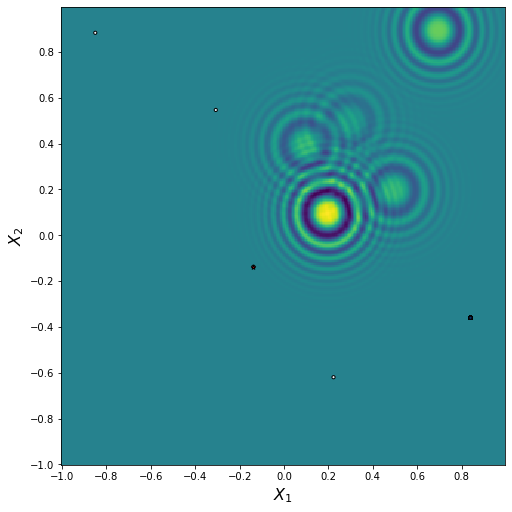

In [7]:
langermann.plot_data(data=d, domain=[-1.,1.])

(<Figure size 504x504 with 1 Axes>,
 <Axes3DSubplot:xlabel='$X_{1}$', ylabel='$X_{2}$'>)

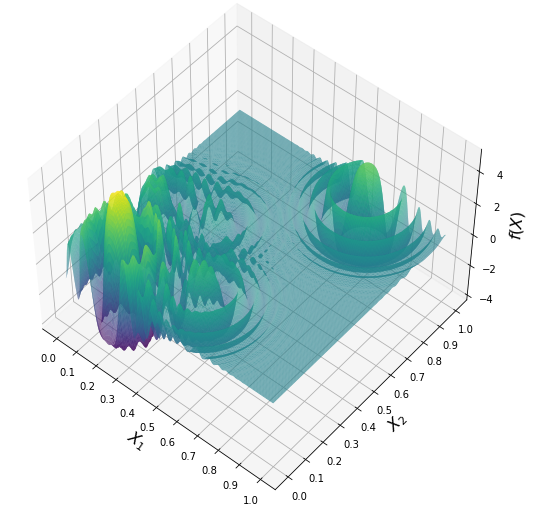

In [8]:
langermann.plot()